# **Federated Neural Network using Smart Agriculture**

Members:

* Padmanavan Kumar - 2105045
* Sohame Mukherjee - 2105070
* Abhishek Panda   - 2105430
* Ayan Chakraborty - 2105783
* Debjyoti Gon     - 2105793

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Crop_recommendation.csv")

# Display dataset overview
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


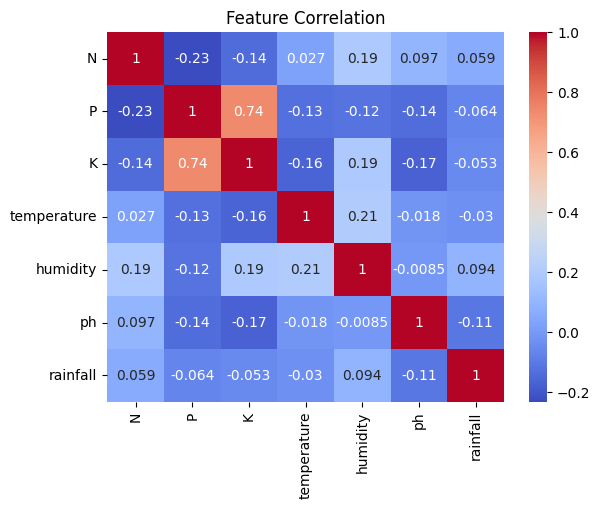

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix, excluding non-numeric columns
corr_matrix = data.drop(columns=['label']).corr()

# Correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


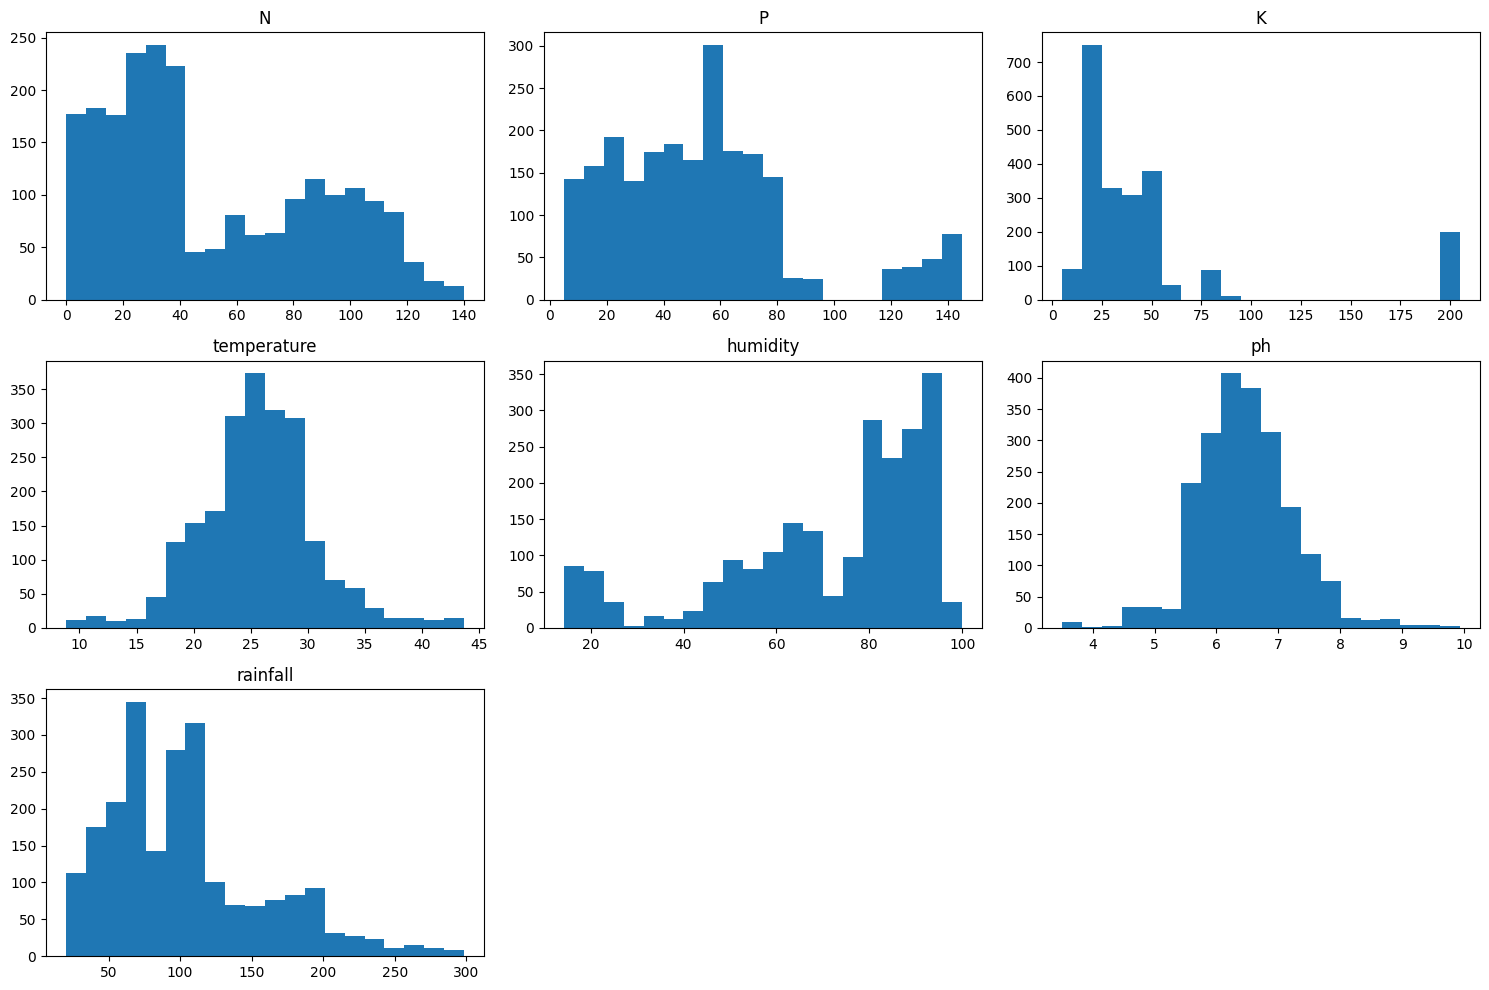

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram for all features
data.drop(columns=['label']).hist(bins=20, figsize=(15, 10), grid=False)
plt.tight_layout()
plt.show()


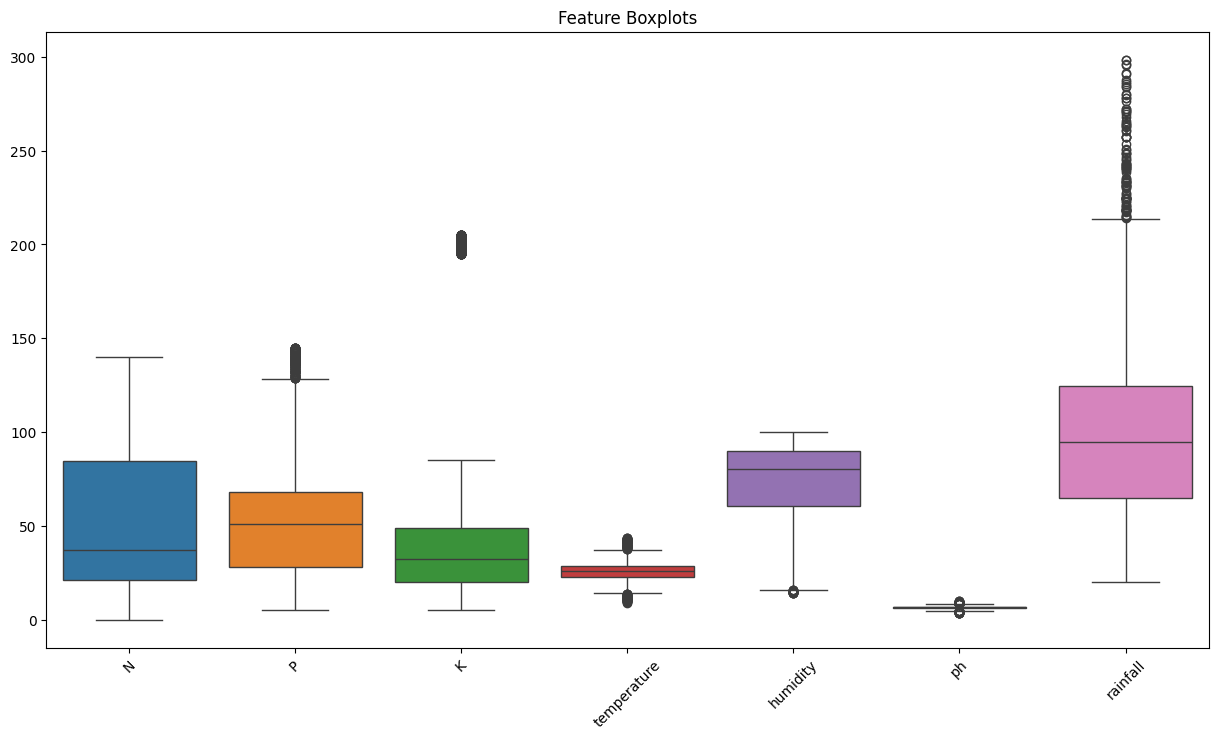

In [ ]:
import seaborn as sns

# Plot boxplots for numerical features
plt.figure(figsize=(15, 8))
sns.boxplot(data=data.drop(columns=['label']))
plt.title("Feature Boxplots")
plt.xticks(rotation=45)
plt.show()


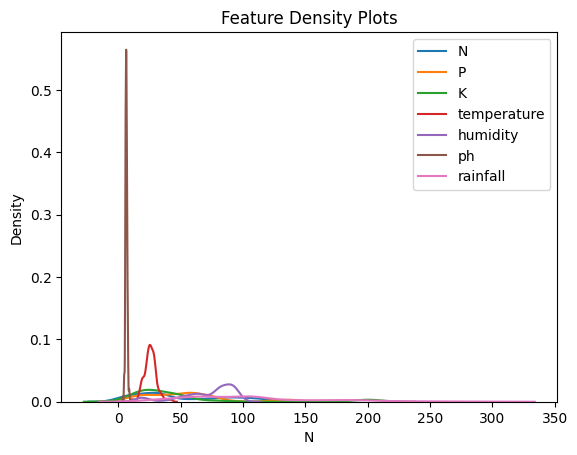

In [ ]:
# Density plot
for column in data.drop(columns=['label']).columns:
    sns.kdeplot(data[column], label=column)

plt.title("Feature Density Plots")
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode the target labels
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label']) # Changed crop_data to data

# Normalize the feature columns
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features]) # Changed crop_data to data

# Prepare the data for training
X = data[features] # Changed crop_data to data
y = data['label_encoded'] # Changed crop_data to data

# Display the first few rows of the preprocessed data
preprocessed_data = data.head() # Changed crop_data to data
label_classes = label_encoder.classes_

preprocessed_data, label_classes

(          N         P         K  temperature  humidity        ph  rainfall  \
 0  1.068797 -0.344551 -0.101688    -0.935587  0.472666  0.043302  1.810361   
 1  0.933329  0.140616 -0.141185    -0.759646  0.397051  0.734873  2.242058   
 2  0.255986  0.049647 -0.081939    -0.515898  0.486954  1.771510  2.921066   
 3  0.635298 -0.556811 -0.160933     0.172807  0.389805  0.660308  2.537048   
 4  0.743673 -0.344551 -0.121436    -1.083647  0.454792  1.497868  2.898373   
 
   label  label_encoded  
 0  rice             20  
 1  rice             20  
 2  rice             20  
 3  rice             20  
 4  rice             20  ,
 array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
        'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
        'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
        'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object))

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Simulate federated clients by splitting the dataset into 5 parts
num_clients = 5

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further split the training set into client datasets
client_data = []
X_train_np, y_train_np = X_train.to_numpy(), y_train.to_numpy()

split_indices = np.array_split(np.arange(X_train_np.shape[0]), num_clients)
for indices in split_indices:
    client_X, client_y = X_train_np[indices], y_train_np[indices]
    client_data.append((client_X, client_y))

# Summary of the splits
client_sizes = [len(data[0]) for data in client_data]
client_sizes


[352, 352, 352, 352, 352]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple FNN model
class FNNModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(FNNModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return self.softmax(x)

# Model parameters
input_size = X.shape[1]
num_classes = len(label_classes)
model = FNNModel(input_size=input_size, num_classes=num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Model summary
model_summary = model
model_summary


FNNModel(
  (fc1): Linear(in_features=7, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=22, bias=True)
  (softmax): Softmax(dim=1)
)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
file_path = 'Crop_recommendation.csv'
data = pd.read_csv(file_path)

# Preprocess the data
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])

features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

X = data[features].values
y = data['label_encoded'].values
num_classes = len(label_encoder.classes_)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define the Feedforward Neural Network
class FNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Hyperparameters
input_size = len(features)
hidden_size = 64
output_size = num_classes
learning_rate = 0.001
num_epochs = 50
batch_size = 32

# Model, loss, and optimizer
model = FNN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Data loader
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(num_epochs):
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    _, y_pred_classes = torch.max(y_pred, 1)
    accuracy = (y_pred_classes == y_test_tensor).float().mean()
    print(f'Test Accuracy: {accuracy:.4f}')

# Display class mappings
print("Class mappings:", {idx: label for idx, label in enumerate(label_encoder.classes_)})


Epoch [10/50], Loss: 0.2722
Epoch [20/50], Loss: 0.1608
Epoch [30/50], Loss: 0.1135
Epoch [40/50], Loss: 0.1402
Epoch [50/50], Loss: 0.0237
Test Accuracy: 0.9864
Class mappings: {0: 'apple', 1: 'banana', 2: 'blackgram', 3: 'chickpea', 4: 'coconut', 5: 'coffee', 6: 'cotton', 7: 'grapes', 8: 'jute', 9: 'kidneybeans', 10: 'lentil', 11: 'maize', 12: 'mango', 13: 'mothbeans', 14: 'mungbean', 15: 'muskmelon', 16: 'orange', 17: 'papaya', 18: 'pigeonpeas', 19: 'pomegranate', 20: 'rice', 21: 'watermelon'}


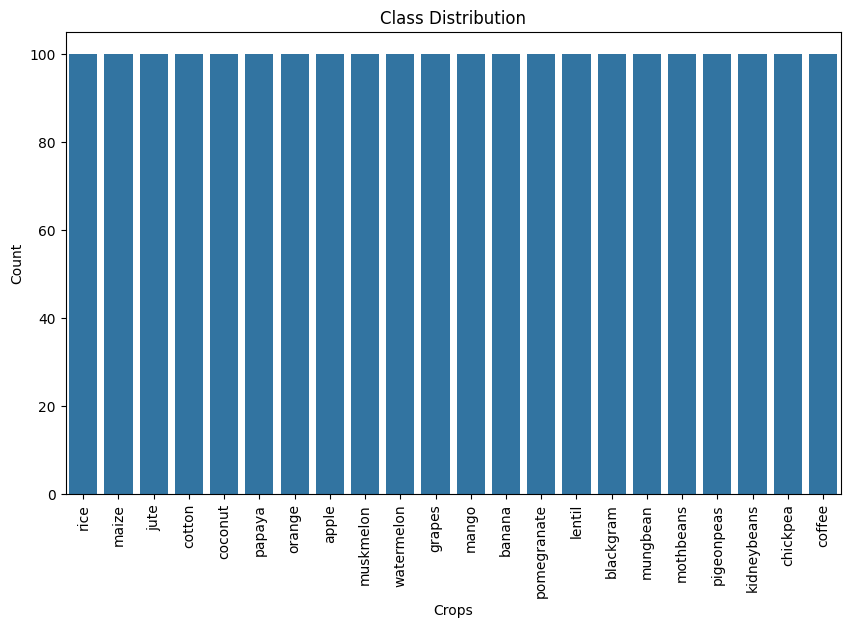

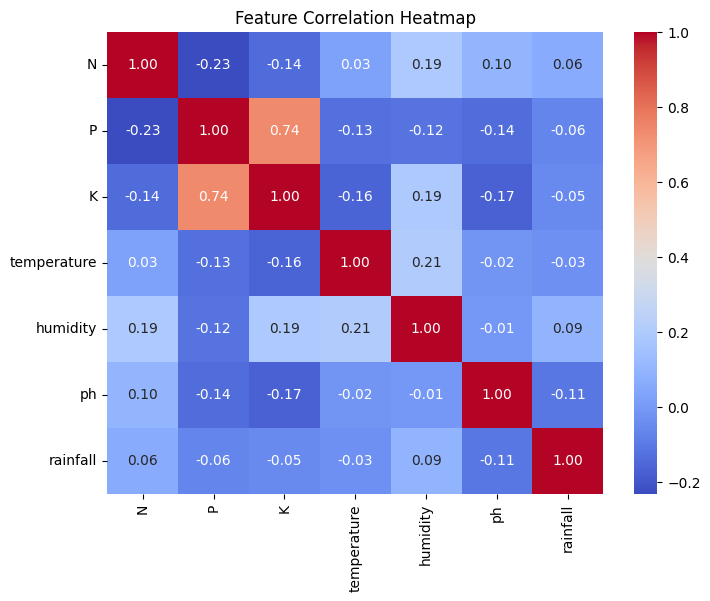

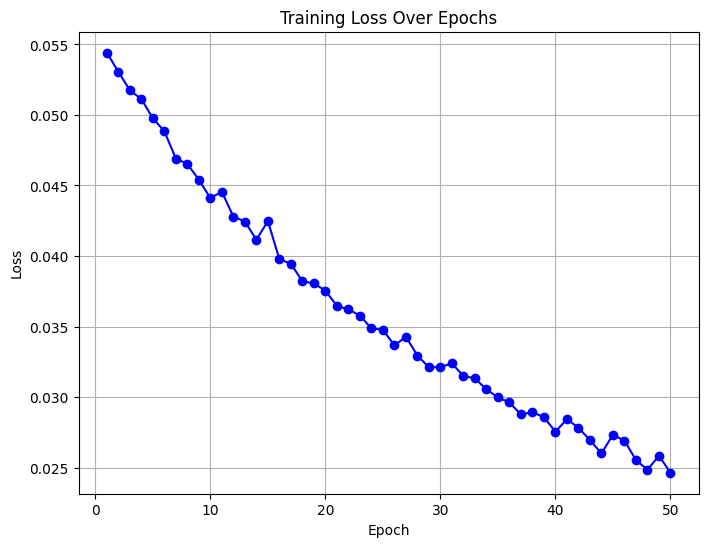

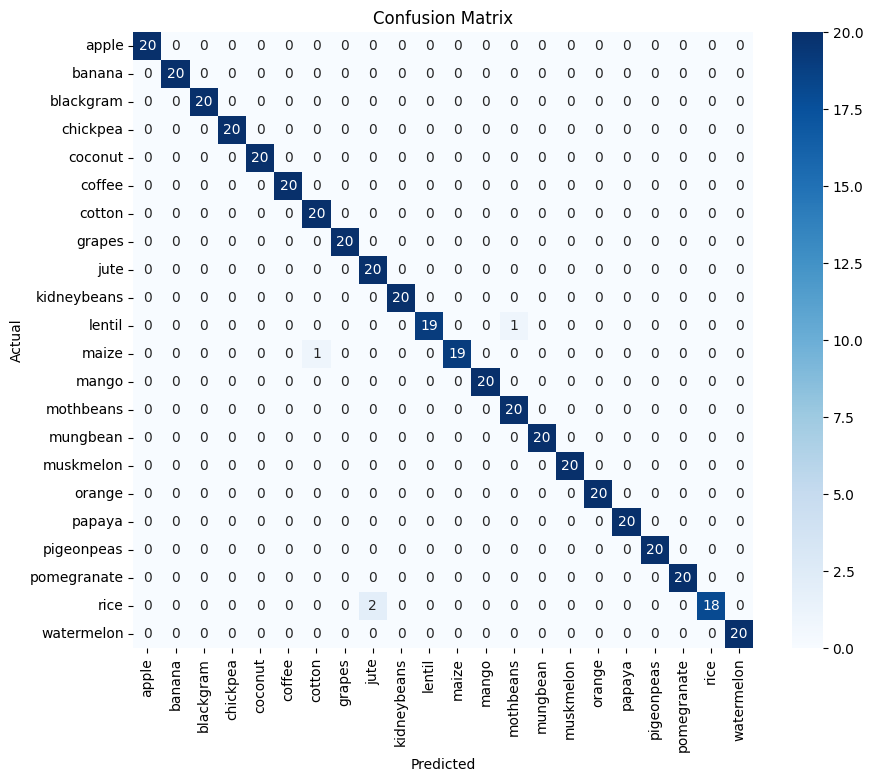

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
        jute       0.91      1.00      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.95      0.97        20
       maize       1.00      0.95      0.97        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.98        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
   

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Class distribution visualization
plt.figure(figsize=(10, 6))
sns.countplot(x=data['label'], order=data['label'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Class Distribution')
plt.xlabel('Crops')
plt.ylabel('Count')
plt.show()

# Correlation heatmap for features
plt.figure(figsize=(8, 6))
correlation_matrix = data[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Plot training loss over epochs
losses = []
model.train()
for epoch in range(num_epochs):
    epoch_loss = 0
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    losses.append(epoch_loss / len(train_loader))

plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), losses, marker='o', linestyle='-', color='b')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Confusion matrix and classification report
y_test_pred = model(X_test_tensor)
_, y_test_pred_classes = torch.max(y_test_pred, 1)

cm = confusion_matrix(y_test_tensor, y_test_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
report = classification_report(y_test_tensor, y_test_pred_classes, target_names=label_encoder.classes_)
print("Classification Report:\n", report)


In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Load the dataset
file_path = 'Crop_recommendation.csv'
data = pd.read_csv(file_path)

# Encode the target labels
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])

# Normalize the feature columns
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Prepare the data for training
X = data[features].values
y = data['label_encoded'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Simulate federated clients
num_clients = 5
split_indices = np.array_split(np.arange(X_train.shape[0]), num_clients)
client_data = [(X_train[indices], y_train[indices]) for indices in split_indices]

# Define the neural network
class CropRecommendationNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(CropRecommendationNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Hyperparameters
input_size = len(features)
output_size = len(np.unique(y))
epochs = 10
batch_size = 32
learning_rate = 0.01

# Training and Federated Averaging
def train_local_model(client_X, client_y, model, criterion, optimizer):
    model.train()
    dataset = torch.utils.data.TensorDataset(torch.tensor(client_X, dtype=torch.float32),
                                              torch.tensor(client_y, dtype=torch.long))
    loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    for _ in range(epochs):
        for inputs, labels in loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

def federated_averaging(global_model, client_models):
    global_state_dict = global_model.state_dict()
    for key in global_state_dict.keys():
        global_state_dict[key] = torch.mean(torch.stack([client.state_dict()[key] for client in client_models]), dim=0)
    global_model.load_state_dict(global_state_dict)

# Initialize models and training
global_model = CropRecommendationNN(input_size, output_size)
client_models = [CropRecommendationNN(input_size, output_size) for _ in range(num_clients)]
criterion = nn.CrossEntropyLoss()

for round in range(5):  # Number of federated learning rounds
    print(f"Federated Learning Round {round + 1}")
    for i, (client_X, client_y) in enumerate(client_data):
        client_model = client_models[i]
        client_model.load_state_dict(global_model.state_dict())  # Initialize with global model weights
        optimizer = optim.SGD(client_model.parameters(), lr=learning_rate)
        train_local_model(client_X, client_y, client_model, criterion, optimizer)

    # Federated averaging
    federated_averaging(global_model, client_models)

# Evaluate the global model
global_model.eval()
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

with torch.no_grad():
    outputs = global_model(X_test_tensor)
    _, predictions = torch.max(outputs, dim=1)
    accuracy = (predictions == y_test_tensor).float().mean().item()

print(f"Global Model Test Accuracy: {accuracy * 100:.2f}%")


Federated Learning Round 1
Federated Learning Round 2
Federated Learning Round 3
Federated Learning Round 4
Federated Learning Round 5
Global Model Test Accuracy: 30.23%


In [50]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Load the dataset
file_path = 'Crop_recommendation.csv'
data = pd.read_csv(file_path)

# Encode the target labels
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])

# Normalize the feature columns
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Prepare the data for training
X = data[features].values
y = data['label_encoded'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Simulate federated clients
num_clients = 5
split_indices = np.array_split(np.arange(X_train.shape[0]), num_clients)
client_data = [(X_train[indices], y_train[indices]) for indices in split_indices]

# Define the neural network
class CropRecommendationNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(CropRecommendationNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        return x

# Hyperparameters
input_size = len(features)
output_size = len(np.unique(y))
epochs = 5
batch_size = 32
learning_rate = 0.0022

# Training and Federated Averaging
def train_local_model(client_X, client_y, model, criterion, optimizer):
    model.train()
    dataset = torch.utils.data.TensorDataset(torch.tensor(client_X, dtype=torch.float32),
                                              torch.tensor(client_y, dtype=torch.long))
    loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    for _ in range(epochs):
        for inputs, labels in loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

def federated_averaging(global_model, client_models):
    global_state_dict = global_model.state_dict()
    for key in global_state_dict.keys():
        global_state_dict[key] = torch.mean(torch.stack([client.state_dict()[key] for client in client_models]), dim=0)
    global_model.load_state_dict(global_state_dict)

# Initialize models and training
global_model = CropRecommendationNN(input_size, output_size)
client_models = [CropRecommendationNN(input_size, output_size) for _ in range(num_clients)]
criterion = nn.CrossEntropyLoss()

for round in range(5):  # Number of federated learning rounds
    print(f"Federated Learning Round {round + 1}")
    for i, (client_X, client_y) in enumerate(client_data):
        client_model = client_models[i]
        client_model.load_state_dict(global_model.state_dict())  # Initialize with global model weights
        optimizer = optim.Adam(client_model.parameters(), lr=learning_rate)
        train_local_model(client_X, client_y, client_model, criterion, optimizer)

    # Federated averaging
    federated_averaging(global_model, client_models)

# Evaluate the global model
global_model.eval()
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

with torch.no_grad():
    outputs = global_model(X_test_tensor)
    _, predictions = torch.max(outputs, dim=1)

# Calculate accuracy and detailed metrics
accuracy = (predictions == y_test_tensor).float().mean().item()
fnn_accuracy = accuracy
print(f"Global Model Test Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_tensor, predictions, target_names=label_encoder.classes_))


Federated Learning Round 1
Federated Learning Round 2
Federated Learning Round 3
Federated Learning Round 4
Federated Learning Round 5
Global Model Test Accuracy: 94.32%

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       0.80      1.00      0.89        20
      grapes       1.00      1.00      1.00        20
        jute       0.92      0.60      0.73        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.95      0.95      0.95        20
       maize       1.00      0.75      0.86        20
       mango       0.95      1.00      0.98        20
   mothbeans       1.00      0.95      0.97      

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Track accuracies
global_accuracies = []
local_accuracies = [[] for _ in range(num_clients)]

for round in range(5):  # Number of federated learning rounds
    print(f"Federated Learning Round {round + 1}")

    # Train local models
    for i, (client_X, client_y) in enumerate(client_data):
        client_model = client_models[i]
        client_model.load_state_dict(global_model.state_dict())  # Initialize with global model weights
        optimizer = optim.Adam(client_model.parameters(), lr=learning_rate)
        train_local_model(client_X, client_y, client_model, criterion, optimizer)

        # Evaluate the local model
        client_X_test, client_y_test = client_X, client_y  # Assuming local test data is the same as local train data
        client_X_test_tensor = torch.tensor(client_X_test, dtype=torch.float32)
        client_y_test_tensor = torch.tensor(client_y_test, dtype=torch.long)

        client_model.eval()
        with torch.no_grad():
            outputs = client_model(client_X_test_tensor)
            _, predictions = torch.max(outputs, dim=1)
            local_accuracy = (predictions == client_y_test_tensor).float().mean().item()
            local_accuracies[i].append(local_accuracy)

    # Federated averaging
    federated_averaging(global_model, client_models)

    # Evaluate the global model
    global_model.eval()
    with torch.no_grad():
        outputs = global_model(X_test_tensor)
        _, predictions = torch.max(outputs, dim=1)
        global_accuracy = (predictions == y_test_tensor).float().mean().item()
        global_accuracies.append(global_accuracy)

    print(f"Global Model Test Accuracy after Round {round + 1}: {global_accuracy * 100:.2f}%")


Federated Learning Round 1
Global Model Test Accuracy after Round 1: 97.05%
Federated Learning Round 2
Global Model Test Accuracy after Round 2: 97.73%
Federated Learning Round 3
Global Model Test Accuracy after Round 3: 98.64%
Federated Learning Round 4
Global Model Test Accuracy after Round 4: 98.41%
Federated Learning Round 5
Global Model Test Accuracy after Round 5: 97.73%


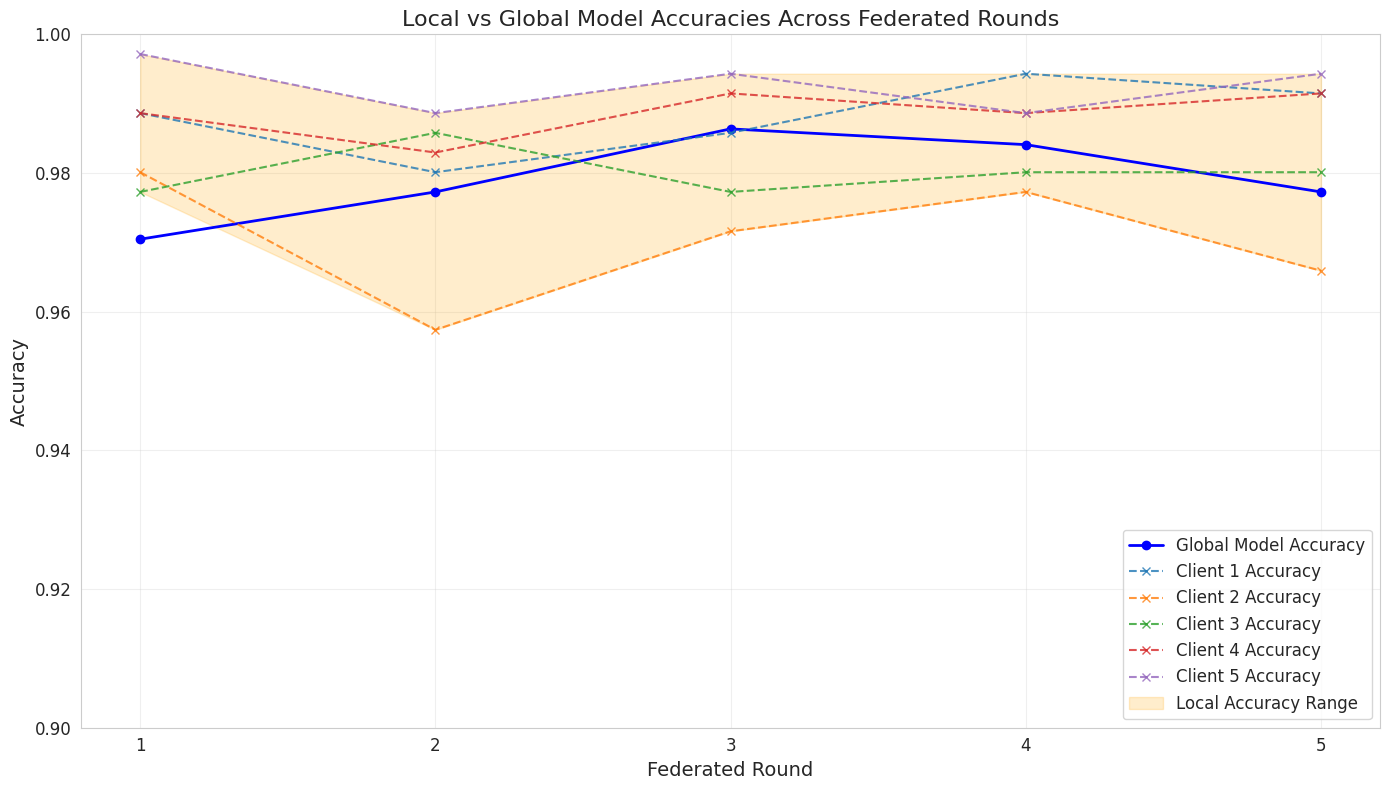

In [58]:
plt.figure(figsize=(14, 8))

# Plot global accuracies
plt.plot(range(1, len(global_accuracies) + 1), global_accuracies,
         label='Global Model Accuracy', marker='o', linestyle='-', linewidth=2, color='blue')

# Plot local accuracies for each client
for i, accuracies in enumerate(local_accuracies):
    plt.plot(range(1, len(accuracies) + 1), accuracies,
             label=f'Client {i+1} Accuracy', marker='x', linestyle='--', alpha=0.8)

# Add shaded range for local accuracies
min_local_accuracies = np.min(local_accuracies, axis=0)
max_local_accuracies = np.max(local_accuracies, axis=0)
plt.fill_between(range(1, len(global_accuracies) + 1),
                 min_local_accuracies, max_local_accuracies, color='orange', alpha=0.2,
                 label='Local Accuracy Range')

# Refine plot
plt.title('Local vs Global Model Accuracies Across Federated Rounds', fontsize=16)
plt.xlabel('Federated Round', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.9, 1.0)  # Focus on relevant accuracy range
plt.xticks(range(1, len(global_accuracies) + 1), fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()


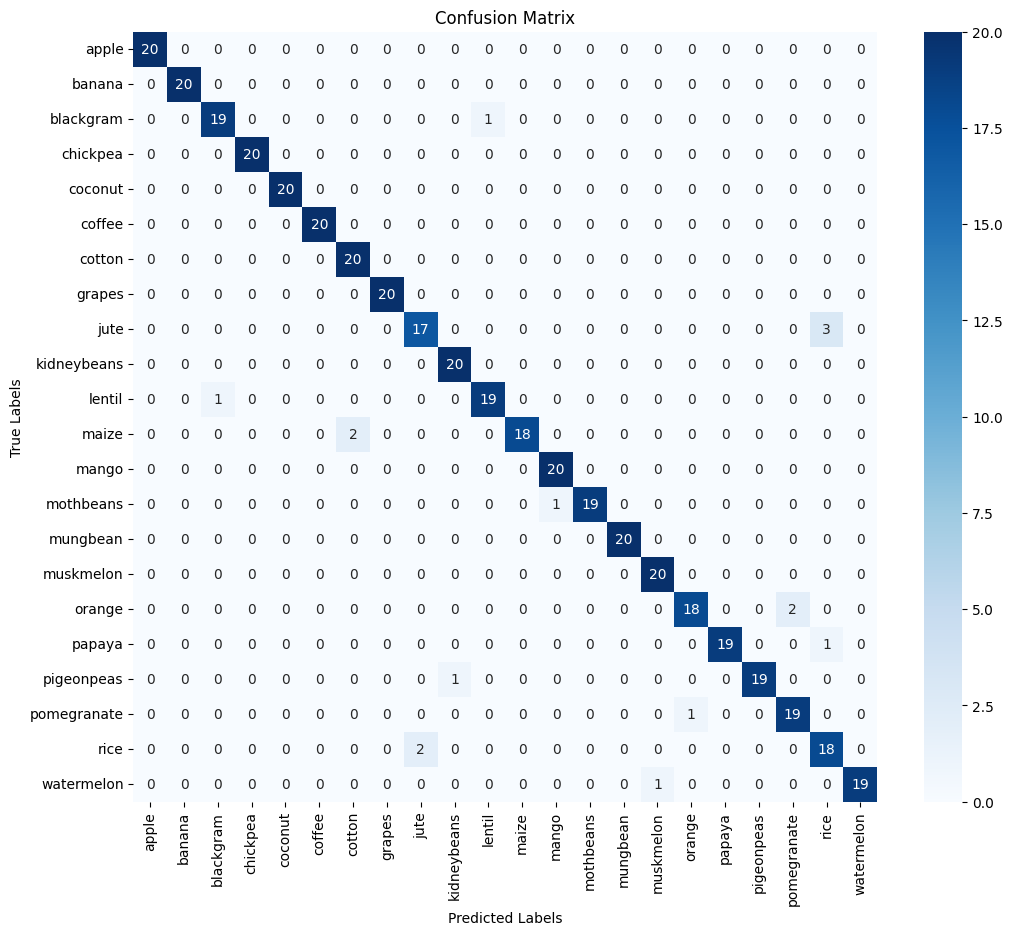

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)
classes = label_encoder.classes_

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


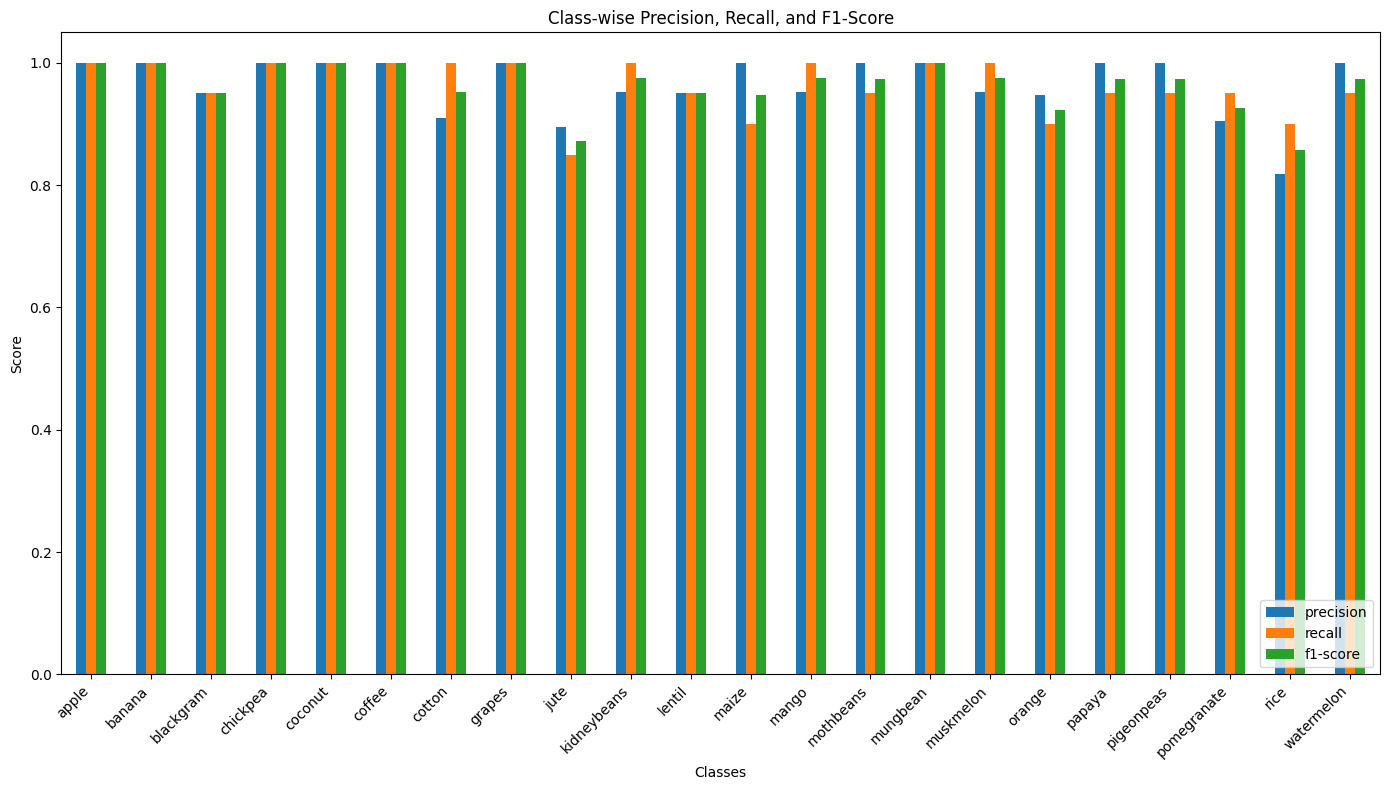

In [22]:
import numpy as np

# Extract metrics from classification report
report = classification_report(y_test, predictions, target_names=label_encoder.classes_, output_dict=True)
metrics_df = pd.DataFrame(report).transpose()
metrics_df = metrics_df.iloc[:-3, :]  # Exclude accuracy, macro avg, and weighted avg

# Plot precision, recall, and F1-score
metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(14, 8))
plt.title('Class-wise Precision, Recall, and F1-Score')
plt.xlabel('Classes')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


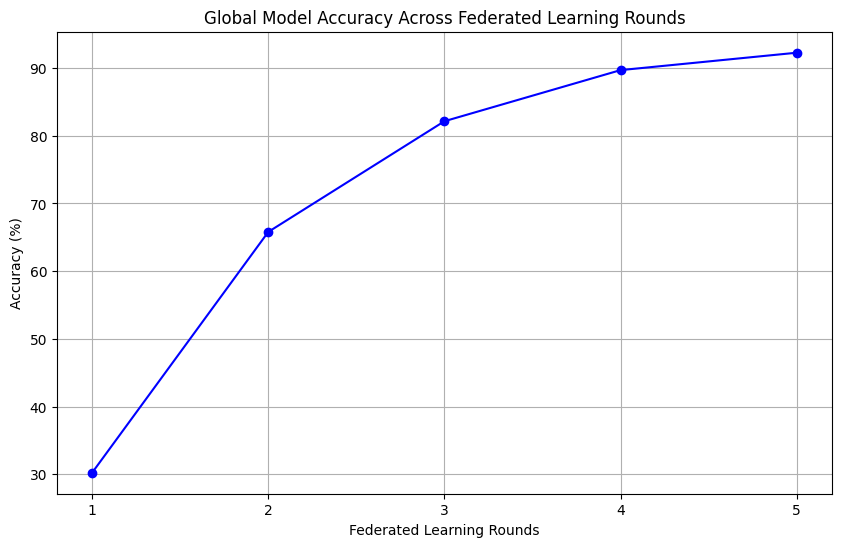

In [23]:
# Example accuracy data per round
rounds = [1, 2, 3, 4, 5]
accuracies = [30.23, 65.80, 82.15, 89.70, 92.27]  # Replace with actual data

# Plot accuracy over rounds
plt.figure(figsize=(10, 6))
plt.plot(rounds, accuracies, marker='o', linestyle='-', color='b')
plt.title('Global Model Accuracy Across Federated Learning Rounds')
plt.xlabel('Federated Learning Rounds')
plt.ylabel('Accuracy (%)')
plt.xticks(rounds)
plt.grid()
plt.show()


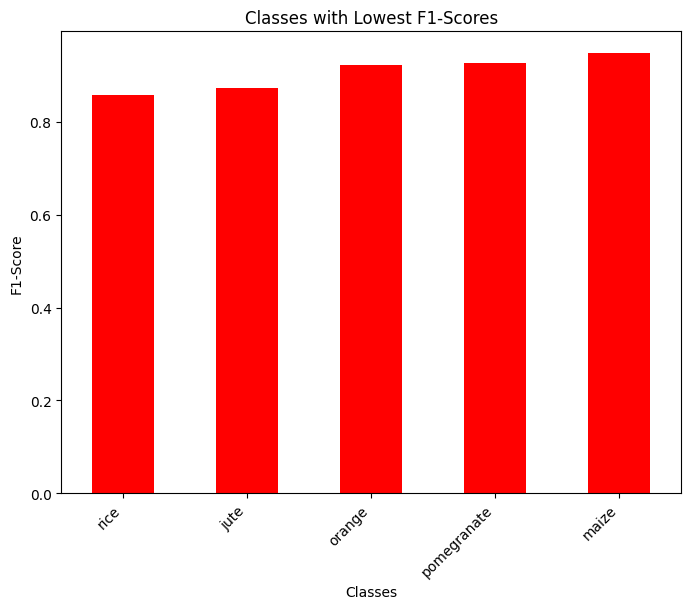

In [24]:
# Identify classes with lowest F1-scores
lowest_f1_classes = metrics_df.nsmallest(5, 'f1-score')

# Plot misclassification
lowest_f1_classes['f1-score'].plot(kind='bar', figsize=(8, 6), color='r')
plt.title('Classes with Lowest F1-Scores')
plt.xlabel('Classes')
plt.ylabel('F1-Score')
plt.xticks(rotation=45, ha='right')
plt.show()


In [25]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import shap
import torch
import numpy as np
import torch.nn as nn


# Define prediction function
def predict(inputs):
    inputs = torch.tensor(inputs, dtype=torch.float32)
    with torch.no_grad():
        outputs = global_model(inputs)
        probabilities = nn.Softmax(dim=1)(outputs)
    # Return probabilities for the predicted class only for each sample
    return probabilities.numpy().argmax(axis=1)
    # or return probabilities.numpy()[:, 1] for binary classification to get probabilities for the positive class


# Ensure features align with X_test
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Compute SHAP values
explainer = shap.Explainer(predict, X_test)
shap_values = explainer(X_test)


# Convert SHAP values to DataFrame
# shap_values.values now should be a 2D array
shap_values_df = pd.DataFrame(shap_values.values, columns=features)

# Compute mean absolute SHAP values for feature importance
feature_importance = shap_values_df.abs().mean().sort_values(ascending=False)
feature_importance_df = feature_importance.reset_index()
feature_importance_df.columns = ['Feature', 'Mean Absolute SHAP Value']

# Bar Plot for Feature Importance
fig = px.bar(
    feature_importance_df,
    x='Mean Absolute SHAP Value',
    y='Feature',
    orientation='h',
    title='Feature Importance',
    labels={'Mean Absolute SHAP Value': 'Mean SHAP Value', 'Feature': 'Features'},
    color='Mean Absolute SHAP Value',
    color_continuous_scale='Blues'
)
fig.update_layout(yaxis=dict(autorange="reversed"))  # Reverse order for better readability
fig.show()

# Scatter Plot for Individual Feature Contributions
# Example: Visualize SHAP values for a single feature (e.g., "N")
feature_to_plot = 'N'
scatter_data = pd.DataFrame({
    'SHAP Value': shap_values_df[feature_to_plot],
    'Feature Value': X_test[:, features.index(feature_to_plot)]
})

scatter_fig = px.scatter(
    scatter_data,
    x='Feature Value',
    y='SHAP Value',
    title=f"SHAP Values for Feature: {feature_to_plot}",
    labels={'Feature Value': f'{feature_to_plot} Value', 'SHAP Value': 'SHAP Value'},
    color='SHAP Value',
    color_continuous_scale='Viridis'
)
scatter_fig.show()

In [45]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

ann_accuracy = 0.0

# Load the dataset
file_path = 'Crop_recommendation.csv'
data = pd.read_csv(file_path)

# Encode the target labels
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])

# Normalize the feature columns
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Prepare the data for training
X = data[features].values
y = data['label_encoded'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the ANN model
class CropRecommendationNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(CropRecommendationNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(64, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Hyperparameters
input_size = len(features)
output_size = len(np.unique(y))
epochs = 5
batch_size = 32
learning_rate = 0.0008

# Initialize model, criterion, and optimizer
model = CropRecommendationNN(input_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
def train_model(X_train, y_train):
    model.train()
    dataset = torch.utils.data.TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                                              torch.tensor(y_train, dtype=torch.long))
    loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(epochs):
        epoch_loss = 0
        for inputs, labels in loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}")

# Evaluate the model
def evaluate_model(X_test, y_test):
    model.eval()
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long)

    with torch.no_grad():
        outputs = model(X_test_tensor)
        _, predictions = torch.max(outputs, dim=1)

    # Calculate accuracy and detailed metrics
    accuracy = (predictions == y_test_tensor).float().mean().item()
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test_tensor, predictions, target_names=label_encoder.classes_))

    return accuracy

# Train and evaluate
train_model(X_train, y_train)
ann_accuracy = evaluate_model(X_test, y_test)


Epoch 1/5, Loss: 157.9725
Epoch 2/5, Loss: 112.3450
Epoch 3/5, Loss: 70.2570
Epoch 4/5, Loss: 49.2168
Epoch 5/5, Loss: 39.7635
Test Accuracy: 87.73%

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      0.85      0.92        20
      banana       1.00      1.00      1.00        20
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        20
     coconut       0.95      1.00      0.98        20
      coffee       1.00      1.00      1.00        20
      cotton       0.80      1.00      0.89        20
      grapes       0.87      1.00      0.93        20
        jute       1.00      0.25      0.40        20
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.94      0.80      0.86        20
       maize       1.00      0.75      0.86        20
       mango       0.80      1.00      0.89        20
   mothbeans       0.84      0.80      0.82        20
    mungbean    

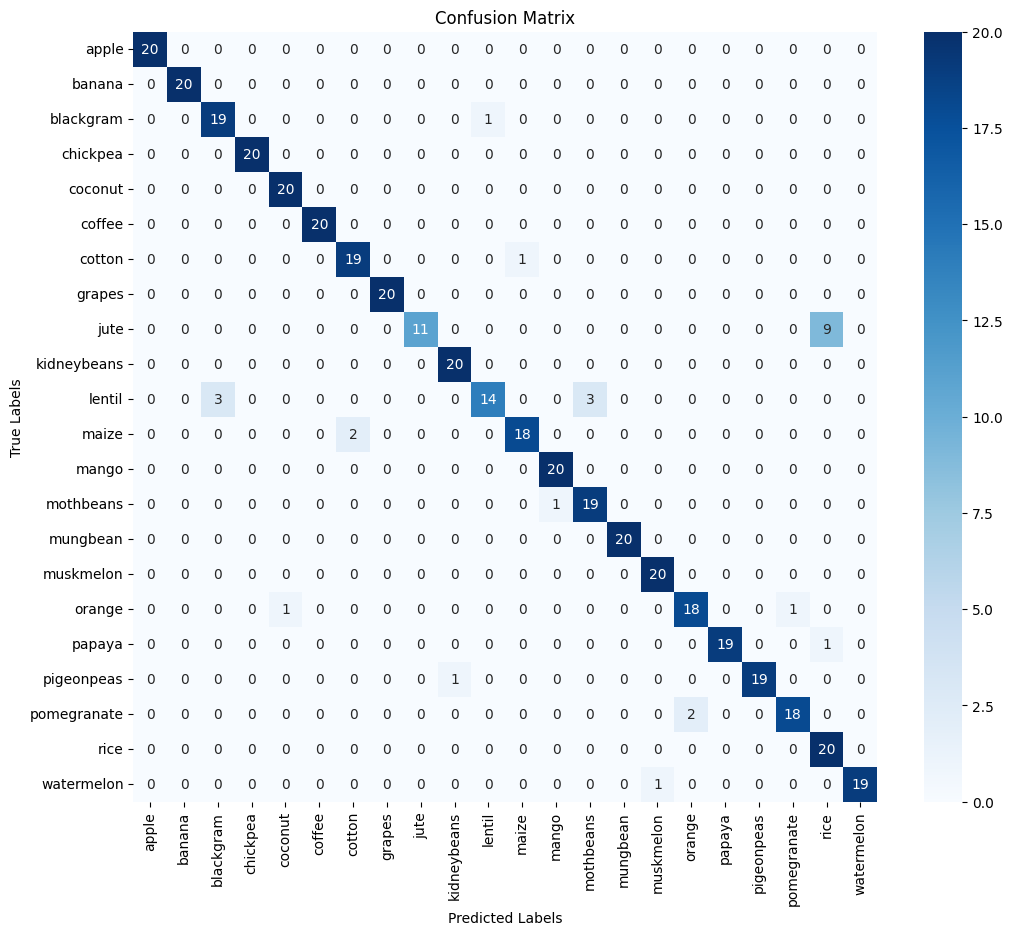

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model and generate predictions
model.eval()
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predictions = torch.max(outputs, dim=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)
classes = label_encoder.classes_

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


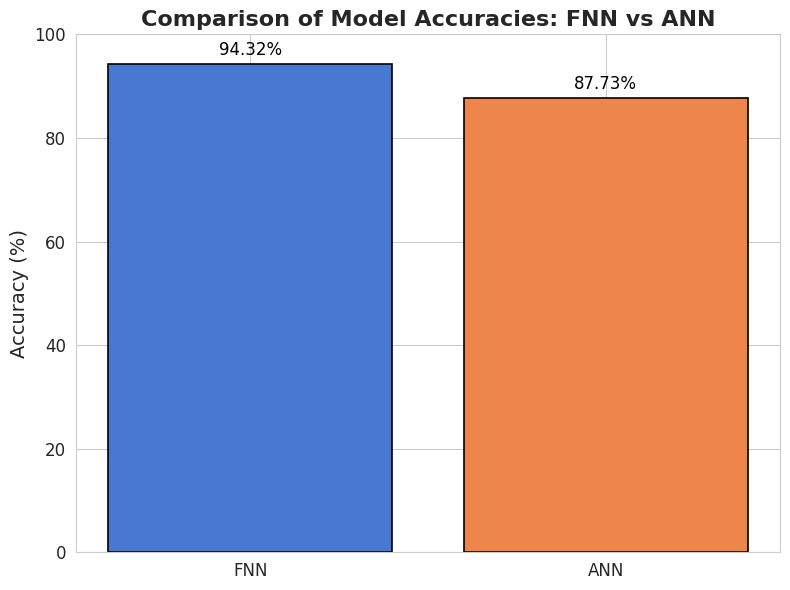

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace with actual accuracies
federated_model_accuracy = fnn_accuracy * 100  # FNN accuracy percentage
ann_model_accuracy = ann_accuracy * 100        # ANN accuracy percentage

# Data
models = ['FNN', 'ANN']
accuracies = [federated_model_accuracy, ann_model_accuracy]

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
colors = sns.color_palette("muted")
bars = plt.bar(models, accuracies, color=colors, edgecolor='black', linewidth=1.2)

# Add text annotations
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             f"{accuracy:.2f}%", ha='center', va='bottom', fontsize=12, color='black')

# Customization
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.title('Comparison of Model Accuracies: FNN vs ANN', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
